## Pretty Pretty Pittsburgh

Lena and Vaishu

**Introduction**

Our project sets out to decide on which Pittsburgh neighborhood is the prettiest. While brainstorming measurable factors to determine the beauty of each neighborhood, we searched for datasets that recorded instances of different pretty, or visually pleasant aspects that could be attributed to neighborhoods. We decided to look at the amount of public art displays, greenways, parks, and bridges, a factor which is uniquely significant to Pittsburgh as a city.


**Metric**

Our metric is *prettiness*, which we will measure by analyzing the amounts of public art displays, greenways, parks and bridges in each neighborhood. The prettiest neighborhood will be determined by looking at the neighborhood with the most instances of these features combined.

**The Prettiest Neighboorhood**

The first metric we will look at is **Public Art**

In [7]:
import pandas as pd
art = pd.read_csv("pghArt.csv")
art[['title','art_type','neighborhood']]
nbhdArt={}

for nbhd in art['neighborhood']:
    artCount=0
    for item in range(len(art)):
        if art.iloc[item,8]==nbhd:
            artCount+=1
        nbhdArt[nbhd]=artCount
    if nbhd not in nbhdArt:
        nbhdArt[nbhd]=0

nbhds=pd.DataFrame.from_dict(nbhdArt, orient='index')
nbhds=nbhds.sort_values(0, ascending=False)
nbhds.head(10)

,0
Central Business District,27
Squirrel Hill South,20
Allegheny Center,18
Highland Park,10
South Side Flats,9
North Shore,8
Beechview,7
Shadyside,6
Brighton Heights,5
Central Oakland,5


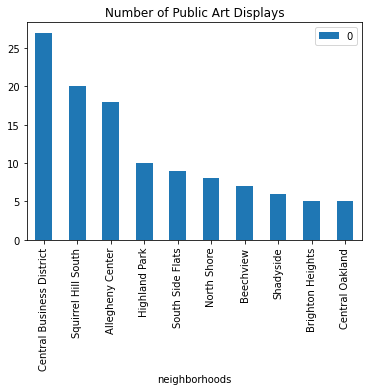

In [6]:
new="neighborhoods"
nbhds.index.rename(new, inplace=True)
nbhds=(nbhds.loc[nbhds[0] > 4])
nbhds[:10].plot(kind='bar', title="Number of Public Art Displays")

Above are the prettiest neighborhoods in terms of number of public art displays. In first place is the **Central Business District**, also known as Downtown.

The second metric we will be looking at is **Bridges**.

In [12]:
import pandas as pd
nbhdBridges = {}

for nbhd in bridges['neighborhood']:
    bridgeCount = 0
    for bridge in range(len(bridges)):
        if bridges.iloc[bridge, 8] == nbhd:
            bridgeCount += 1
        nbhdBridges[nbhd] = bridgeCount
    if nbhd not in nbhdBridges:
        nbhdBridges[nbhd] = 0
    
nbhds = pd.DataFrame.from_dict(nbhdBridges, orient = 'index')
nbhds = nbhds.sort_values(0, ascending = False)
nbhds.head(10)

,0
Squirrel Hill South,14
Central Business District,12
Troy Hill,7
Overbrook,6
Hays,6
Shadyside,6
Oakwood,5
South Side Slopes,5
South Side Flats,5
West End,4


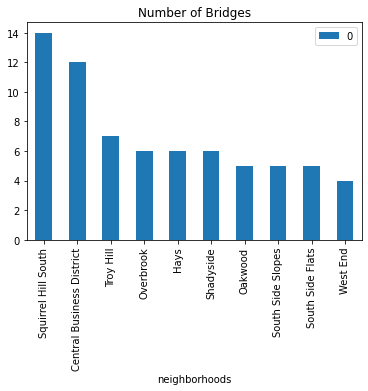

In [9]:
new = "neighborhoods"
nbhds.index.rename(new, inplace = True)
nbhds = (nbhds.loc[nbhds[0] > 3])
nbhds[:10].plot(kind = 'bar', title = "Number of Bridges")

Above are the prettiest neighborhoods in terms of number of bridges. In first place is **Squirrel Hill South**.

The third metric we will be looking at are **Parks**.

In [8]:
import pandas as pd

parkSeries = pd.Series(parks['type'])
parkQueryMask = parkSeries.str.contains("Park")
parkTypes = parks[parkQueryMask]
parkTypes.head(5)
parks = pd.read_csv("pghParks.csv")
nbhdJustParks = {}

for nbhd in parkTypes['neighborhood']:
    parkCount = 0
    for park in range(len(parkTypes)):
        if parks.iloc[park, 6] == nbhd:
            parkCount += 1
        nbhdParks[nbhd] = parkCount
    if nbhd not in nbhdParks:
        nbhdParks[nbhd] = 0
    
nbhdJustParks = pd.DataFrame.from_dict(nbhdParks, orient = 'index')
nbhdJustParks = nbhdJustParks.sort_values(0, ascending = False)
nbhdJustParks.head(10)

,0
East Liberty,10
Central Business District,9
Beechview,6
Mount Washington,6
Hazelwood,6
Point Breeze,6
South Side Slopes,5
South Oakland,5
Brighton Heights,4
Central Northside,3


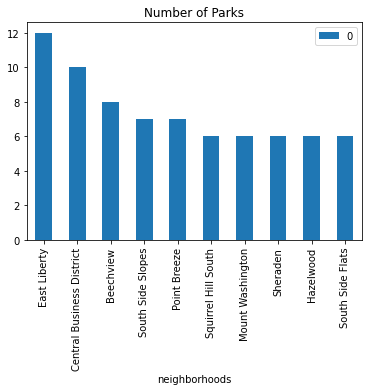

In [11]:
nbhdJustParks=(nbhdJustParks.loc[nbhdJustParks[0] > 2])
nbhdJustParks.head(10)
nbhds[:10].plot(kind = 'bar', title = "Number of Parks")

Above are the prettiest neighborhoods in terms of number of parks. In first place is **East Liberty**.

After looking at the previous three metrics, we end up with three different neighborhoods in first place as the "prettiest neighborhood" - the Central Business District (Downtown), Squirrel Hill South, and East Liberty.

In order to determine which neighborhood is the prettiest, we looked at a 4th dataset consisting of greenways: a strip of undeveloped land near an urban area, set aside for recreational use or environmental protection (pictured below).

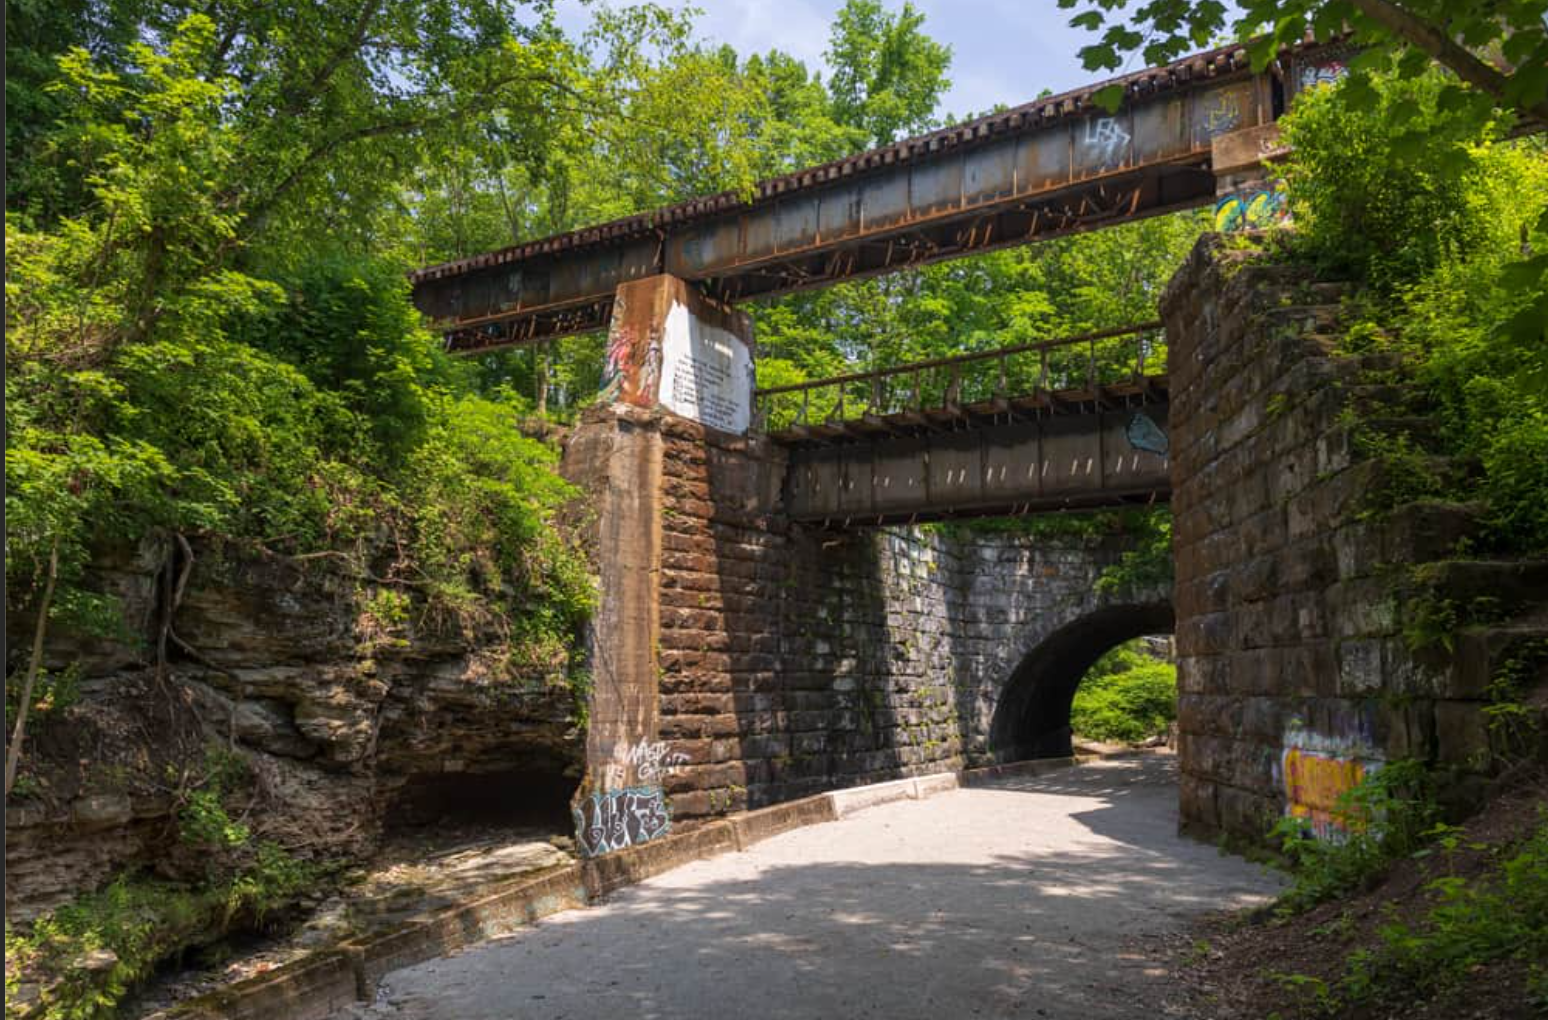

In [4]:
from IPython.display import Image, display
imageFileName = 'greenway.png'
display(Image(filename = imageFileName))

As the greenways were present in a limited amount of neighborhoods (and not in all three that ended up in first place according to the other datasets), we made a table consisting of all four of these features and their 'weighted score' in terms of importance to the overall beauty of the neighborhood. **Public Art** and **Bridges** contributed 1 point to the overall score per each one, **Parks** contributed 2 points, and **Greenways** contributed 3. The breakdown of how many of each was present in the neighborhoods as well as the overall score can be seen below.

In [7]:
import pandas as pd
scores = pd.read_csv("neighborhoodScores.csv")
scores[['Neighborhood', 'Public Art ', 'Bridges', 'Parks ', 'Greenways', 'Score ']]

,Neighborhood,Public Art,Bridges,Parks,Greenways,Score
0,Central Business District,27,12,9,NaN,57
1,Squirrel Hill South,20,14,3,1.0,43
2,South Side Flats,9,5,6,NaN,26
3,Allegheny Center,18,3,2,NaN,25
4,Beechview,7,1,6,1.0,23
5,East Liberty,1,2,10,NaN,23
6,Hazelwood,3,4,6,1.0,22
7,Beechview,7,1,6,NaN,20
8,North Shore,8,1,3,1.0,18
9,Troy Hill,1,7,5,NaN,18


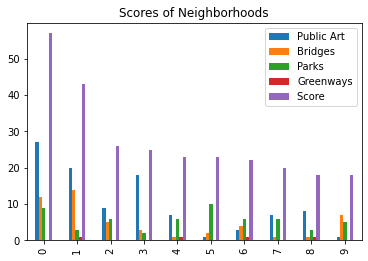

In [8]:
scores[:10].plot(kind = 'bar', title = "Scores of Neighborhoods")

The bar graph above shows the amount of points that public art, bridges, parks, and greenways all contributed to the final score of the top 9 neighborhoods.